In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Defining the second order differential equation
$$
    EI\frac{d^2y}{dx^2} = \frac{\omega L x}{2} - \frac{\omega x^2}{2}
$$

In [2]:
## solving the differential equations using shooting method

# defining constants
E = 200*1e9    # pascals
I = 3000*1e-8   # m^4
w = 1000   # N/m (omega i.e angular velocity)
L = 3   # Length of the rod

# defining function to return set of first order equations
def derivs(x,s):
    """
    The set of the differential equations are
    dy/dx = v
    dv/dx = (1/EI)*((w*L*x/2)-(w*x^2/2))
    
    Input parameters
    ==========================
    x = position
    s[0] = y(x)
    s[1] = dy/dx(x)
    """
    return [s[1], (1/(E*I))*((w*L*x/2)-(w*x**2/2))]

## defining initial and boundary conditions
# setup of the problem
x0 = 0
x_eval = np.linspace(x0,L,1000)
# defining boundary conditions
y0 = 0
yL = 0


# defining initial guess
Guess = [0, -1]
master_sol = []
for v in Guess:
    sol = solve_ivp(derivs, [x0, L], np.array(
        [y0, v], dtype='object'), t_eval=x_eval)
    master_sol.append(sol)

In [3]:
## getting accurate velocity using root finding approach

# defining objective function as a function of guess velocity
def objective(v):
    sol = solve_ivp(derivs,[x0,L],np.array([y0,v],dtype='object'),t_eval=x_eval)
    end_point = sol.y[0][-1]
    return end_point - yL

vRoot = fsolve(objective,-0.1)
print("Optimal dy/dt: %2.6f"%vRoot)

Optimal dy/dt: -0.000188


C:\Users\bipra\miniconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [4]:
# getting solution for optimal guess
sol = solve_ivp(derivs,[x0,L],np.array([y0,vRoot],dtype='object'),t_eval=x_eval)

Text(0.5, 0.98, 'Deflection of Beam')

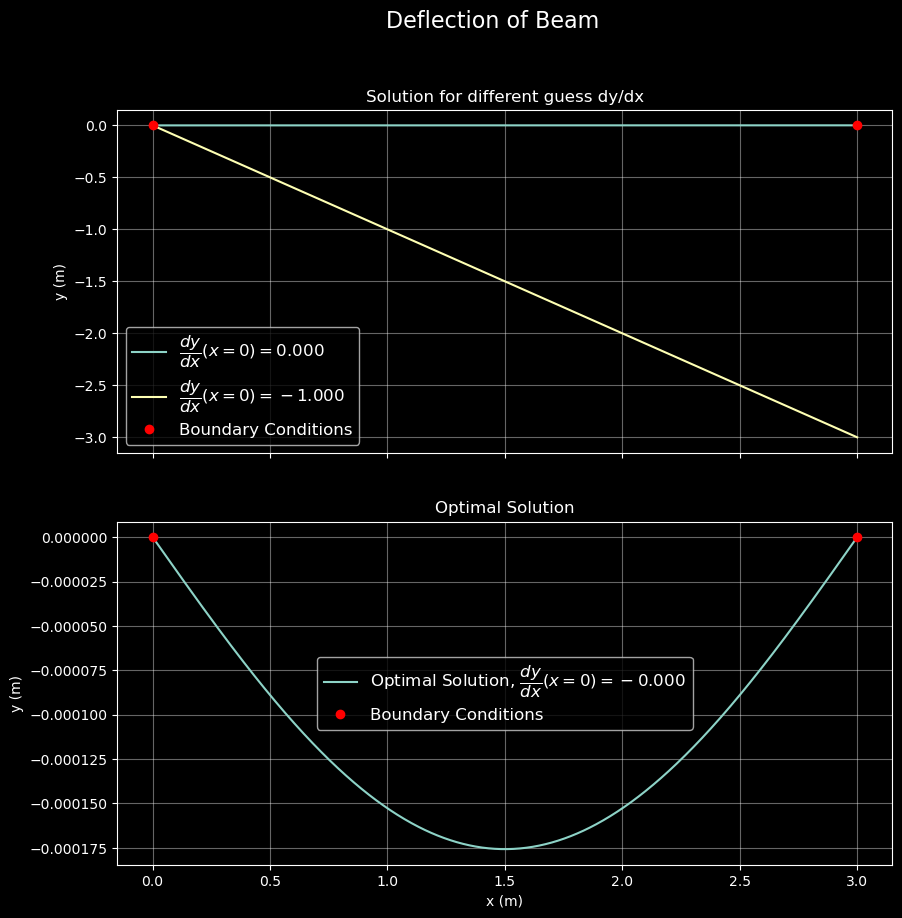

In [5]:
# plotting geuss  and optimal solutions in 2 subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10), dpi=100, sharex=True)
# plotting guess solution
ax[0].plot(x_eval, master_sol[0].y[0],
           label='$\\dfrac{dy}{dx}(x=0)=%2.3f$' % Guess[0])
ax[0].plot(x_eval, master_sol[1].y[0],
           label='$\\dfrac{dy}{dx}(x=0)=%2.3f$' % Guess[1])
ax[0].plot([0, L], [y0, yL], 'ro', label='Boundary Conditions')
# plotting Optimal Solution
ax[1].plot(sol.t, sol.y[0],
           label='Optimal Solution, $\\dfrac{dy}{dx}(x=0)=%2.3f$' % vRoot)
ax[1].plot([0, L], [y0, yL], 'ro', label='Boundary Conditions')

ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
ax[0].grid(alpha=0.4)
ax[1].grid(alpha=0.4)
ax[1].set_xlabel('x (m)')
ax[0].set_ylabel('y (m)')
ax[1].set_ylabel('y (m)')
ax[0].set_title('Solution for different guess dy/dx')
ax[1].set_title('Optimal Solution')

plt.suptitle('Deflection of Beam', fontsize=16)
